# Analyze eatrhquake data 

The notebook helps explore and analyze earthquake data. This includes loading data in `pandas` data frame and displaying graphs using `matplotlib` library. We'll go through below steps: 

## Table of contents
1. [Get data](#data_set)

2. [Load data](#load_data)

3. [Access data](#access_data)

4. [Explore data](#explore_data)

5. [Plot the results](#plot_data)

<a id="data_set"></a> 
## 1. Get data
In this notebook, we will explore and analyze earthquake data from all over the world when earchwuakes were noted on a Richter scale of 2.5 or higer.

The raw earthquake data set is from [USGS](http://earthquake.usgs.gov/earthquakes/search/), a website for which provides earthquake data for analyses.

To get the earthquake data set:
1. Click [USGS](http://earthquake.usgs.gov/earthquakes/search/).   
2. Select Magnitude, date and Geographic Region details.
3. Hit the Search buttn to save the CSV to your machine.



<a id="load_data"></a>
## 2. Load data
You can add the CSV file that you downloaded to this notebook by dragging the file to the **Data Source** pane in the notebook **Palette** in the notebook. 
The data file is listed on the **Data Source** pane and is saved in the Object Storage instance associated with your Analytics for Apache Spark service.
The progress bar below the file in the **Data Source** panel indicates the status of the load process. In the next step, you will learn how to access files in Object Storage.

<a id="access_data"></a> 
## 3. Access data 

**[pandas](http://pandas.pydata.org/)** is a useful Python package for managing structured data.  The two primary data structures of pandas are [`Series`](http://pandas-docs.github.io/pandas-docs-travis/dsintro.html#series) (1-dimensional) and [`DataFrame`](http://pandas-docs.github.io/pandas-docs-travis/dsintro.html#dataframe) (2-dimensional).

In the following steps, you will load the `eq.csv` file into a DataFrame in memory.

To run code cells in a notebook, click Run Cell (**&#9658;**) in the notebook toolbar.  While the code in the cell is running, a `[*]` appears next to the cell. After the code has run, the `[*]` is replaced by a number indicating that the code cell is the *N*th cell to run in the notebook.

In [1]:
import requests, StringIO, pandas as pd, json, re

###  Access Object Storage

Because the `eq.csv` file is located in Object Storage, you need to define a helper function to access the data file that you loaded. Run the following cell to define the method `get_file_content()`:

In [2]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""
    
    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()    
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

### Insert data source credentials

To add the credentials to access the `precipitation.csv` file which is stored in Object Storage, click the next code cell and select the `Insert to code` function below the data file in the **Data Source** pane in the notebook palette.

The credentials for accessing the `precipitation.csv` file are added to the cell as a Python dictionary. With these credentials, you can use the helper function to load the data file into a `pandas.DataFrame`. 

**Note**: When you select the `Insert to code` function, a code cell with a dictionary is created for you.  Adjust the credentials in the Python dictionary to correspond with the credentials inserted by the `Insert to code` function and run the dictionary code cell. The access credentials to the Object Storage instance in the dictionary are provided for convenience for later usage. 

In [3]:
credentials_2 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_41f1070d_fa61_404e_b265_7d781be12baa',
  'project_id':'78a47228e2b4426fbea2b45d8b8aa251',
  'region':'dallas',
  'user_id':'22bc4cbc5f944fc8a2b2a923c3d2ecf1',
  'domain_id':'87c803acc1ec4e2b9bdd3ebdd1985070',
  'domain_name':'1137929',
  'username':'admin_d383b654798c1d12cc25831aa441deafb53932ad',
  'password':"""Tc=3I3lBPngASO~T""",
  'filename':'eq.csv',
  'container':'notebooks',
  'tenantId':'sd94-1c59561b715ce4-09a5d9fc31f5'
}

### Load data into `pandas DataFrame`

Run the next cell to load the data into a pandas DataFrame: 

In [4]:
content_string = get_file_content(credentials_2)
eq_df = pd.read_csv(content_string)

<a id="explore_data"></a> 
## 4. Explore data

Now that your data is in memory, you can begin to explore and manipulate it.

Show the first five and the last five rows of the data by using the `head()` and `tail()` methods.  Run each code cell:

In [5]:
eq_df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-10-12T17:55:00.830Z,19.1670,-155.537994,0.65,2.65,ml,52,90.0,0.072650,0.34,...,2016-10-12T18:00:43.100Z,"7km SW of Pahala, Hawaii",earthquake,0.43,0.21,0.230,12,automatic,hv,hv
1,2016-10-12T14:11:21.000Z,63.5892,-147.704400,1.40,3.00,ml,NaN,NaN,NaN,0.82,...,2016-10-12T15:08:36.810Z,"65km ENE of Cantwell, Alaska",earthquake,0.30,0.30,NaN,NaN,automatic,ak,ak
2,2016-10-12T10:39:23.000Z,18.9745,-64.438500,14.00,2.60,Mb,6,316.8,0.579413,0.18,...,2016-10-12T12:29:46.735Z,"64km NNE of Road Town, British Virgin Islands",earthquake,2.00,2.50,0.000,5,reviewed,pr,pr
3,2016-10-12T10:39:15.770Z,10.7260,144.775200,21.06,5.10,mb,NaN,50.0,2.847000,0.99,...,2016-10-12T10:55:58.040Z,"238km N of Faraulep, Micronesia",earthquake,6.40,5.70,0.059,92,reviewed,us,us
4,2016-10-12T08:24:47.120Z,51.3739,-177.535800,54.77,4.30,mb,NaN,188.0,0.535000,1.21,...,2016-10-12T08:42:59.040Z,"70km SE of Tanaga Volcano, Alaska",earthquake,8.40,6.10,0.066,66,reviewed,us,us


In [6]:
eq_df.tail(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1231,2016-09-13T05:54:03.200Z,38.609833,-112.563667,4.11,2.6,ml,24,61,0.09125,0.17,...,2016-09-13T15:45:54.210Z,"37km N of Beaver, Utah",earthquake,0.47,1.39,0.173,18,reviewed,uu,uu
1232,2016-09-13T02:15:21.380Z,36.246500,-98.423800,5.00,3.4,mb_lg,NaN,44,0.24000,0.66,...,2016-09-13T16:10:28.205Z,"5km ESE of Fairview, Oklahoma",earthquake,0.90,2.00,0.124,17,reviewed,us,us
1233,2016-09-13T02:05:48.280Z,36.240500,-98.432200,5.00,3.6,mb_lg,NaN,44,0.23700,0.56,...,2016-09-13T16:12:09.500Z,"5km SE of Fairview, Oklahoma",earthquake,1.30,1.00,0.052,96,reviewed,us,us
1234,2016-09-13T00:07:21.950Z,-28.756400,61.406900,10.00,4.3,mb,NaN,172,9.13400,0.30,...,2016-10-02T02:43:01.040Z,Southwest Indian Ridge,earthquake,15.00,2.00,0.267,4,reviewed,us,us
1235,2016-09-13T00:02:19.580Z,-17.844000,-177.883700,601.88,4.0,mb,NaN,106,3.87200,0.63,...,2016-10-02T02:25:51.040Z,Fiji region,earthquake,15.10,9.60,0.134,15,reviewed,us,us


Each row in the table lists:

* Earthquake time 
* Type of earthquake, magnitude, depth, area, and other details.

By using the `DataFrame` API, we can list all the magnitude types

In [7]:
eq_df['magType'].values

array(['ml', 'ml', 'Mb', ..., 'mb_lg', 'mb', 'mb'], dtype=object)

We can quickly analyse data using pivot table utility. Here, we'll group and count the earthquakes as per magnitude type.

In [8]:
eq_df.pivot_table(index="magType", aggfunc=len, values="time")

magType
Mb         1
Md       148
mb       531
mb_lg     65
md        19
ml       410
ms_20      1
mw        10
mwb        6
mwp        4
mwr       26
mww       15
Name: time, dtype: int64

In [9]:
# pv1 is the table which shows the relation between location sources and the type of earthquakes which have occured there
pv1 = eq_df.pivot_table(index="locationSource", columns="magType", aggfunc=len, values = "time")
pv1

magType,Mb,Md,mb,mb_lg,md,ml,ms_20,mw,mwb,mwp,mwr,mww
locationSource,,,,,,,,,,,,
ak,NaN,NaN,NaN,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN,NaN
car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
ci,NaN,NaN,NaN,NaN,NaN,71,NaN,7,NaN,NaN,NaN,NaN
guc,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
hv,NaN,NaN,NaN,NaN,3,14,NaN,NaN,NaN,NaN,NaN,NaN
isk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
ismp,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
ld,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
ldg,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


From the above table we can get information which type of earthquakes are most common. This will be determined by the count of each column above.


In [10]:
pv2 = pv1.count()
pv2

magType
Mb        1
Md        1
mb        4
mb_lg     2
md        3
ml       16
ms_20     1
mw        2
mwb       1
mwp       1
mwr       3
mww       1
dtype: int64

Similarly we can see the other parameters which can lead to interesting results. For each row, we can also get the range of data using `describe()` function

In [11]:
pv1.describe()

magType,Mb,Md,mb,mb_lg,md,ml,ms_20,mw,mwb,mwp,mwr,mww
count,1,1,4.000000,2.000000,3.000000,16.000000,1,2.000000,1,1,3.000000,1
mean,1,148,132.750000,32.500000,6.333333,25.625000,1,5.000000,6,4,8.666667,15
std,NaN,NaN,260.177343,44.547727,7.571878,55.202506,NaN,2.828427,NaN,NaN,13.279056,NaN
min,1,148,1.000000,1.000000,1.000000,1.000000,1,3.000000,6,4,1.000000,15
25%,1,148,1.000000,16.750000,2.000000,2.000000,1,4.000000,6,4,1.000000,15
50%,1,148,3.500000,32.500000,3.000000,5.500000,1,5.000000,6,4,1.000000,15
75%,1,148,135.250000,48.250000,9.000000,16.250000,1,6.000000,6,4,12.500000,15
max,1,148,523.000000,64.000000,15.000000,221.000000,1,7.000000,6,4,24.000000,15


<a id="plot_data"></a> 
## 5. Plot the results

Now, we show our results in a visual way by using the popular [`matplotlib`](http://matplotlib.org/) package to create plots.

First, render the results as inline charts:

In [12]:
%matplotlib inline 

Now we'll plot a simple bar chart which shows the data graphically.

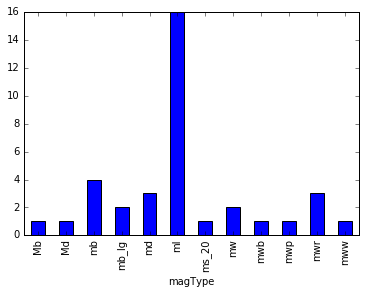

In [13]:
import matplotlib.pyplot as plt, numpy as np
plot = pv2.plot(kind='bar')

Similarly we can analyze the depth trends from the original table. This gives a view of how deep within the earth's crust the earthquakes are likely to occur.

In [14]:

new_table = eq_df[['depth','place','locationSource']]
new_table.describe()


,depth
count,1236.000000
mean,59.862103
std,111.566480
min,-2.000000
25%,10.000000
50%,19.050000
75%,58.050000
max,657.090000


In [15]:
pv3 = eq_df.pivot_table(index="magType", columns="locationSource", aggfunc=len, values = "time")
pv3

locationSource,ak,car,ci,guc,hv,isk,ismp,ld,ldg,lim,...,nn,pgc,pr,rom,se,sko,tul,us,uu,uw
magType,,,,,,,,,,,,,,,,,,,,,
Mb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Md,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,1,NaN,NaN,NaN,523,NaN,NaN
mb_lg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,64,NaN,NaN
md,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
ml,221,NaN,71,2,14,NaN,1,2,1,NaN,...,4,2,NaN,NaN,NaN,1,36,23,10,6
ms_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
mw,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mwb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN


In [16]:
pv3.sum()

locationSource
ak      221
car       1
ci       78
guc       8
hv       17
isk       1
ismp      1
ld        2
ldg       1
lim       1
mb        5
nc       29
nn        4
pgc       2
pr      149
rom       1
se        1
sko       1
tul      37
us      660
uu       10
uw        6
dtype: float64

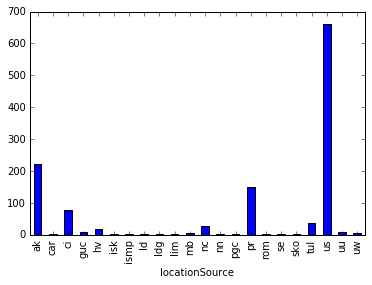

In [17]:
pv3.sum().plot(kind='bar')

Now we'll use hadoop for better analysis of this data and larger implications lying therein. We'll start by creating RDD first.

<a id="access_data"></a>
## Access data
Before we can access data in the data file in Object Storage by using the [`SparkContext`](https://spark.apache.org/docs/1.6.0/api/python/pyspark.html#pyspark.SparkContext) object, you must set the Hadoop configuration by using the following configuration function:

In [22]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v3/auth/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)

Add the credentials to access the csv file in the next code cell by using the `Insert to code` function below the CSV file in the **Data Source** panel. 

Adjust the credentials in the Python dictionary, which is prepared for you, to correspond with the credentials inserted by the `Insert to code` function and run the dictionary code cell. The access credentials to the Object Storage instance in the dictionary are provided for convenience for later usage. 


In [24]:
credentials = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_41f1070d_fa61_404e_b265_7d781be12baa',
  'project_id':'78a47228e2b4426fbea2b45d8b8aa251',
  'region':'dallas',
  'user_id':'22bc4cbc5f944fc8a2b2a923c3d2ecf1',
  'domain_id':'87c803acc1ec4e2b9bdd3ebdd1985070',
  'domain_name':'1137929',
  'username':'admin_d383b654798c1d12cc25831aa441deafb53932ad',
  'password':"""Tc=3I3lBPngASO~T""",
  'filename':'2Parking_Violations_Issued_-_Fiscal_Year_2017.csv',
  'container':'notebooks',
  'tenantId':'sd94-1c59561b715ce4-09a5d9fc31f5'
}

In [25]:
credentials['name'] = 'keystone'
set_hadoop_config(credentials)

Now we can access the data by using the preconfigured `SparkContext` function in your notebook. 

First create a resilient distributed dataset ([`RDD`](https://spark.apache.org/docs/1.6.0/programming-guide.html#resilient-distributed-datasets-rdds)) of the raw data file. You can refer to it by using a URI of the form:

```
swift://container_name.name/object_name
```

If you didn't define a container name, at the time you created the Object Storage instance, the default container name that is used is `notebooks`. In this case, you can run the next code cell as it stands. Otherwise, change the container name. For `name` insert the Hadoop configuration name you defined, for example, `keystone`.

In [26]:
equake = sc.textFile("swift://notebooks.keystone/eq.csv")

The RDD just created is a collection of strings corresponding to the individual lines in the raw data file. It is also important to remember that the RDD is defined but not instantiated. By applying an action like `count` to the RDD, you effectively instantiate the RDD.

In [27]:
print "Total records in the eq.csv dataset:", equake.count()

Total records in the eq.csv dataset: 1237


Apply another action to the same RDD that reads the first row of the data.

In [28]:
# Use take method to display a few lines from the table
print "The first five rows in the dataset:", parking.take(5)

The first five rows in the dataset: [u'time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource', u'2016-10-12T17:55:00.830Z,19.1669998,-155.5379944,0.65,2.65,ml,52,90,0.07265,0.34,hv,hv61441641,2016-10-12T18:00:43.100Z,"7km SW of Pahala, Hawaii",earthquake,0.43,0.21,0.23,12,automatic,hv,hv', u'2016-10-12T14:11:21.000Z,63.5892,-147.7044,1.4,3,ml,,,,0.82,ak,ak14199369,2016-10-12T15:08:36.810Z,"65km ENE of Cantwell, Alaska",earthquake,0.3,0.3,,,automatic,ak,ak', u'2016-10-12T10:39:23.000Z,18.9745,-64.4385,14,2.6,Mb,6,316.8,0.57941336,0.18,pr,pr16286002,2016-10-12T12:29:46.735Z,"64km NNE of Road Town, British Virgin Islands",earthquake,2,2.5,0,5,reviewed,pr,pr', u'2016-10-12T10:39:15.770Z,10.726,144.7752,21.06,5.1,mb,,50,2.847,0.99,us,us20007dd3,2016-10-12T10:55:58.040Z,"238km N of Faraulep, Micronesia",earthquake,6.4,5.7,0.059,92,reviewed,us,us']


<a id="parse_data"></a>
## Parse data

The data now needs to be parsed into columns. We'll use lambda functions in Python for this.

The lambda notation in Python is used to create anonymous functions, in other words, functions which are not bound to a name. This concept is used in the previous code cell to pass a function as a parameter to the `map` function. The anonymous function receives each line from the `weather` RDD  and splits it at comma boundaries. As a result, the new `weatherParse` RDD is defined as a list of lists. Each list in `weatherParse` corresponds to a line in `weather`, and the strings in each list are the individual elements of the row.

In [38]:
equakeParse = equake.map(lambda line : line.split(","))

Run the next cell for a quick look at the first line of the list.

In [39]:
equakeParse.first()

[u'time',
 u'latitude',
 u'longitude',
 u'depth',
 u'mag',
 u'magType',
 u'nst',
 u'gap',
 u'dmin',
 u'rms',
 u'net',
 u'id',
 u'updated',
 u'place',
 u'type',
 u'horizontalError',
 u'depthError',
 u'magError',
 u'magNst',
 u'status',
 u'locationSource',
 u'magSource']

<a id="explore_data"></a>
## Explore data
To better consume the earthquake data, it has to be converted or mapped from one raw form into another format.


To look at the earthquakes with magnitude type "ml", we'll filter the data using the lambda function.

In [31]:
equakeMake = equakeParse.filter(lambda x: x[5] == "ml") # All rows where magType is "ml"
equakeMake.take(2)

[[u'2016-10-12T17:55:00.830Z',
  u'19.1669998',
  u'-155.5379944',
  u'0.65',
  u'2.65',
  u'ml',
  u'52',
  u'90',
  u'0.07265',
  u'0.34',
  u'hv',
  u'hv61441641',
  u'2016-10-12T18:00:43.100Z',
  u'"7km SW of Pahala',
  u' Hawaii"',
  u'earthquake',
  u'0.43',
  u'0.21',
  u'0.23',
  u'12',
  u'automatic',
  u'hv',
  u'hv'],
 [u'2016-10-12T14:11:21.000Z',
  u'63.5892',
  u'-147.7044',
  u'1.4',
  u'3',
  u'ml',
  u'',
  u'',
  u'',
  u'0.82',
  u'ak',
  u'ak14199369',
  u'2016-10-12T15:08:36.810Z',
  u'"65km ENE of Cantwell',
  u' Alaska"',
  u'earthquake',
  u'0.3',
  u'0.3',
  u'',
  u'',
  u'automatic',
  u'ak',
  u'ak']]

In [33]:
print "Number of earthquakes with magType 'ml' are: ", equakeMake.count()

Number of earthquakes with magType 'ml' are:  410


We'll use this RDD to perform map and reduce functions to find out average magnitude of earthquakes across locations. 
- We'll first use the map function to see as per magnitude which places had an earthquake
- Then we reduce by adding the magnitudes together
- Then we find out the average

In [88]:
# x[21] is the locationSource
# x[4] is the magnitude
equakeMakeCountByKey = equakeMake.map(lambda x : (x[21], (float(x[4]),1)))

In [82]:
equakeMakeCountByKey.take(10)

[(u'hv', (2.65, 1)),
 (u'ak', (3.0, 1)),
 (u'ak', (2.6, 1)),
 (u'ak', (2.5, 1)),
 (u'ak', (3.9, 1)),
 (u'tul', (2.8, 1)),
 (u'ak', (2.9, 1)),
 (u'ak', (3.2, 1)),
 (u'hv', (2.54, 1)),
 (u'ak', (2.5, 1))]

In [83]:
equakeMakeCountByKey = equakeMakeCountByKey.reduceByKey(lambda v1,v2 : (v1[0]+v2[0], v1[1]+v2[1]))

In [84]:
equakeMakeCountByKey.take(20)

[(u'guc', (8.3, 2)),
 (u'ci', (170.68, 60)),
 (u'ldg', (3.8, 1)),
 (u'nn', (11.600000000000001, 4)),
 (u'uu', (26.490000000000002, 10)),
 (u'ak', (644.3000000000001, 221)),
 (u'hv', (40.71, 14)),
 (u'ld', (5.21, 2)),
 (u'us', (71.5, 23)),
 (u'tul', (101.69999999999999, 36)),
 (u'sko', (3.1, 1)),
 (u'uw', (16.99, 6)),
 (u'reviewed', (31.79, 11)),
 (u'nc', (33.15, 11)),
 (u'ismp', (2.65, 1)),
 (u'pgc', (7.2, 2)),
 (u'mb', (13.45, 5))]

In [85]:
equakeAverages = equakeMakeCountByKey.map(lambda k: (k[0], k[1][0] / float(k[1][1] ) ) )

In [87]:
equakeAverages.take(20)

[(u'guc', 4.15),
 (u'ci', 2.844666666666667),
 (u'ldg', 3.8),
 (u'nn', 2.9000000000000004),
 (u'uu', 2.649),
 (u'ak', 2.9153846153846157),
 (u'hv', 2.907857142857143),
 (u'ld', 2.605),
 (u'us', 3.108695652173913),
 (u'tul', 2.8249999999999997),
 (u'sko', 3.1),
 (u'uw', 2.8316666666666666),
 (u'nc', 3.0136363636363637),
 (u'ismp', 2.65),
 (u'pgc', 3.6),
 (u'reviewed', 2.89),
 (u'mb', 2.69)]

In [92]:
eqTop10=[]
eqmagTop10=[]
for pair in equakeAverages.map(lambda (x,y) : (y,x)).top(10):
    eqTop10.append(pair[0])
    eqmagTop10.append(pair[1])
    print "Place %s had average earthquake magnitude of %f" % (pair[1],pair[0])

Place guc had average earthquake magnitude of 4.150000
Place ldg had average earthquake magnitude of 3.800000
Place pgc had average earthquake magnitude of 3.600000
Place us had average earthquake magnitude of 3.108696
Place sko had average earthquake magnitude of 3.100000
Place nc had average earthquake magnitude of 3.013636
Place ak had average earthquake magnitude of 2.915385
Place hv had average earthquake magnitude of 2.907857
Place nn had average earthquake magnitude of 2.900000
Place reviewed had average earthquake magnitude of 2.890000


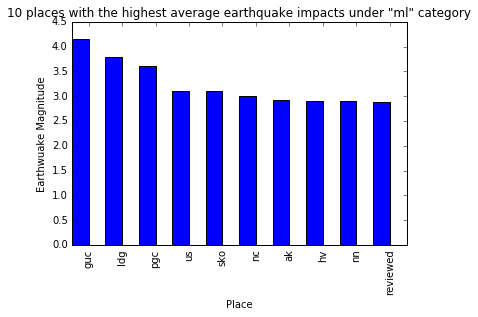

In [96]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, eqTop10, bar_width,
                 color='b')
plt.xlabel('Place')
plt.ylabel('Earthwuake Magnitude')
plt.title('10 places with the highest average earthquake impacts under "ml" category')
plt.xticks(index + bar_width, eqmagTop10, rotation=90)
plt.show()